In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
canada = pd.read_excel('canada.xlsx')
canada.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

canada.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage','Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 
             'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'], axis=1, inplace=True)

canada.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

canada.columns = list(map(str, canada.columns))
canada.set_index('Country', inplace=True)

canada['Total'] = canada.sum(axis=1)
years = list(map(str, range(1980, 2014)))
print('data dimensions:', canada.shape)

canada.head(2)

data dimensions: (195, 38)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [4]:
canada_tot = canada[years].transpose()

canada_tot.index = map(int, canada_tot.index)
canada_tot.index.name = 'Year'

canada_tot.reset_index(inplace=True)
canada_tot.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [5]:
#normalize Brazil data
norm_brazil = (canada_tot['Brazil'] - canada_tot['Brazil'].min()) / (canada_tot['Brazil'].max()- canada_tot['Brazil'].min())
#normalize Argentina data
norm_argentina = (canada_tot['Argentina'] - canada_tot['Argentina'].min()) / (canada_tot['Argentina'].max() - canada_tot['Argentina'].min())

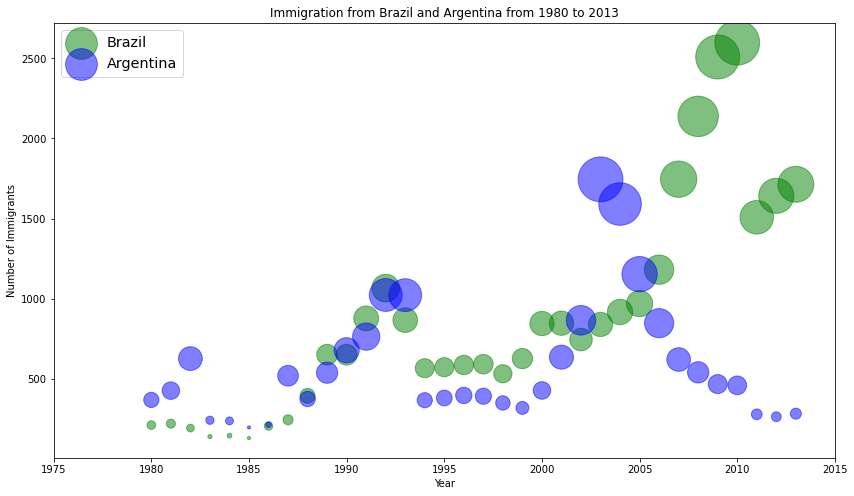

In [6]:
# Brazil
ax0 = canada_tot.plot(kind='scatter', x='Year', y='Brazil', figsize=(14, 8), alpha=0.5, color='green',
                    s=norm_brazil * 2000 + 10, 
                    xlim=(1975, 2015))

# Argentina
ax1 = canada_tot.plot(kind='scatter', x='Year', y='Argentina', alpha=0.5, color="blue",
                    s=norm_argentina * 2000 + 10,ax=ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [7]:
# normalized Chinese data
norm_china = (canada_tot['China'] - canada_tot['China'].min()) / (canada_tot['China'].max() - canada_tot['China'].min())
 
    # normalized Indian data
norm_india = (canada_tot['India'] - canada_tot['India'].min()) / (canada_tot['India'].max() - canada_tot['India'].min())

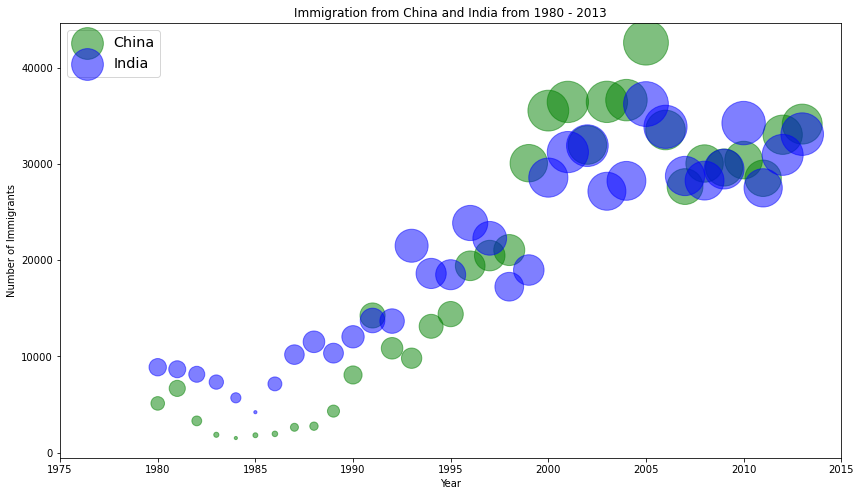

In [8]:
# China
ax0 = canada_tot.plot(kind='scatter', x='Year', y='China', figsize=(14, 8), alpha=0.5, color='green', 
                    s=norm_china * 2000 + 10, xlim=(1975, 2015))

 # India
ax1 = canada_tot.plot(kind='scatter', x='Year', y='India', alpha=0.5, color="blue",
                    s=norm_india * 2000 + 10, ax = ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')